### Load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
df = pd.read_csv('./data/annotated_points_np_150.csv')
df.head()

,x,y,labels
0,7.076613,17.467532,1.0
1,11.733871,18.035714,2.0
2,14.153226,14.870130,4.0
3,16.693548,17.954545,5.0
4,21.532258,21.120130,5.0


In [3]:
df.shape

(150, 3)

### Plot the data

Text(0.5, 1.0, 'Scatter plot of x and y')

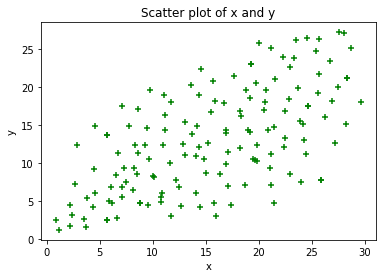

In [4]:
plt.scatter(df.x, df.y, c = 'green', marker = '+')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

- Estimate of coefficients: $w = (X^TX)^{-1}X^Ty$

### Define General Function

In [5]:
def LLRSLASSO(df, n, lamda):
    # Data Matrix
    dm = np.ones(df.shape[0])
    for i in range(1,n+1):
        dm = np.vstack((dm,df.x**i))
    X = dm.T
    # Response Variable
    y = np.array(df.y).reshape(df.shape[0],1)
    # Estimated Weights
    w = np.linalg.inv(X.T@X + lamda*np.eye(n+1))@X.T@y
    y_hat = X@w
    mse = np.mean((y-y_hat)**2)
    return w,y_hat,mse

In [6]:
def plotting(df, w, n):
    x = np.linspace(np.min(df.x),np.max(df.x),df.shape[0])
    dm = np.ones(df.shape[0])
    for i in range(1,n+1):
        dm = np.vstack((dm,x**i))
    X = dm.T
    y = X@w
    plt.scatter(df.x, df.y, c = 'green', marker = '+')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter plot of x and y with fitted line')
    plt.plot(x, y, '-r')

### Try for some value of $\lambda$ and $n$

In [7]:
w,y_hat,mse = LLRSLASSO(df, 10, 0.05)

In [8]:
mses = np.array([LLRSLASSO(df, i, 0)[2] for i in range(1,11)])
pd.DataFrame({'n':range(1,11), 'MSE':mses})

,n,MSE
0,1,27.344096
1,2,27.336374
2,3,27.124994
3,4,27.091517
4,5,27.073637
5,6,27.073366
6,7,27.042255
7,8,26.876482
8,9,26.842980
9,10,26.878948


### Plot for different degree of polynomial with OLS ($\lambda = 0$)

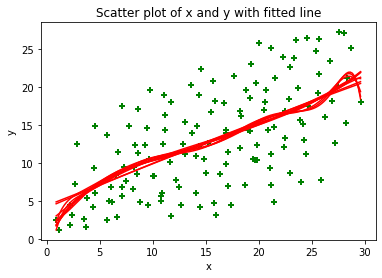

In [9]:
for i in range(1,11):
    plotting(df,LLRSLASSO(df, i, 0)[0],i)

### Comparison

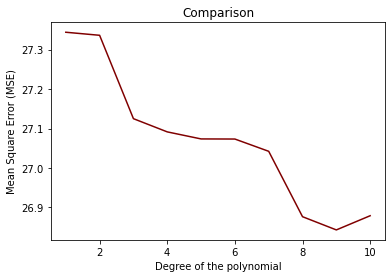

In [10]:
plt.plot(range(1,11), mses, color = 'maroon')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Comparison')
plt.show()

#### From the above plot, it is clear that 9 degree polynomial is best fitted.

In [11]:
result = [[LLRSLASSO(df, i, j)[2] for j in np.linspace(0,1,11)]  for i in range(1,11)]
result = pd.DataFrame(result, columns = ['lambda='+str(i) for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]])
result

,lambda=0,lambda=0.1,lambda=0.2,lambda=0.3,lambda=0.4,lambda=0.5,lambda=0.6,lambda=0.7,lambda=0.8,lambda=0.9,lambda=1
0,27.344096,27.344139,27.344268,27.344481,27.344777,27.345152,27.345607,27.346138,27.346745,27.347426,27.348179
1,27.336374,27.336486,27.336811,27.337337,27.338051,27.338940,27.339993,27.341201,27.342553,27.344040,27.345653
2,27.124994,27.125036,27.125154,27.125336,27.125572,27.125855,27.126178,27.126533,27.126917,27.127325,27.127752
3,27.091517,27.091520,27.091528,27.091541,27.091559,27.091583,27.091611,27.091644,27.091682,27.091725,27.091772
4,27.073637,27.073804,27.074185,27.074670,27.075202,27.075752,27.076305,27.076853,27.077392,27.077923,27.078445
5,27.073366,27.073664,27.074192,27.074744,27.075274,27.075775,27.076252,27.076710,27.077157,27.077596,27.078033
6,27.042255,27.042971,27.043791,27.044425,27.044923,27.045332,27.045683,27.045997,27.046285,27.046557,27.046816
7,26.876482,26.898905,26.913031,26.921137,26.926558,26.930609,26.933882,26.936676,26.939161,26.941430,26.943542
8,26.842980,26.843397,26.843610,26.843643,26.843657,26.843756,26.843771,26.843851,26.843914,26.843940,26.844018
9,26.878948,26.841534,26.843532,26.842460,26.841252,26.843324,26.841218,26.841354,26.852753,26.843612,26.841626


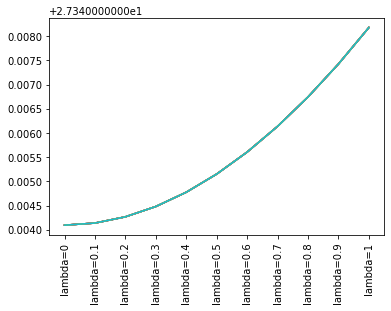

In [12]:
for i in range(10):
    plt.plot(result.iloc[0])
plt.xticks(['lambda='+str(i) for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]], rotation='vertical')
plt.show()

##### MSEs are almost same for all $\lambda$ for highly linearly related data.